# Assignment 1

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

Show the scatter plot of bi-variate random numbers (2-d samples) $X$ generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).

* You can use [`numpy.random.multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html?highlight=multivariate#numpy.random.multivariate_normal) to generate random samples.

In [3]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

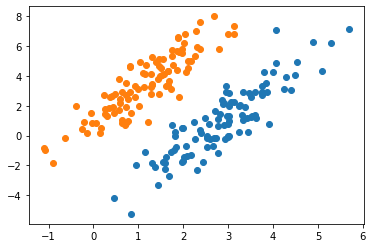

In [71]:
# Implement your code here
mean1 = np.array([3, 1])
cov1 = np.array([[1, 2], [2, 5]])

mean2 = np.array([1, 3])
cov2 = np.array([[1, 2], [2, 5]])

num = 100
sample1 = np.random.multivariate_normal(mean1, cov1, num)
sample2 = np.random.multivariate_normal(mean2, cov2, num)

plt.scatter(sample1[:, 0], sample1[:, 1])
plt.scatter(sample2[:, 0], sample2[:, 1])
plt.show()

## (2) PCA

Apply PCA to the 2-d samples generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in / library function of PCA, such as `sklearn.decomposition.PCA`)


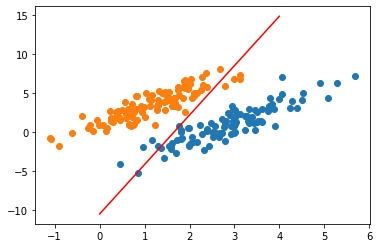

In [77]:
# Implement your code here

data = np.vstack((sample1, sample2)).T # d x data_num
data_mean = np.mean(data, axis=1)
centralized = data - data_mean.reshape(2, 1)
values, vectors = LA.eig(centralized @ centralized.T)
principal = vectors[:, np.argmax(values)]

# x1 = np.array([np.min(centralized), np.max(centralized)])
# x1 = np.array([np.min(data, axis=1)[0], np.max(data, axis=1)[0]])
x1 = np.array([0, 4])
slope = principal[1] / principal[0]
intercept = data_mean[1] - slope * data_mean[0]
plt.plot(x1, x1 * slope + intercept, color="red")
plt.scatter(sample1[:, 0], sample1[:, 1])
plt.scatter(sample2[:, 0], sample2[:, 1])
plt.show()

## (3) LDA

Apply Fisher LDA to the 2-d samples generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA, such as `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`)

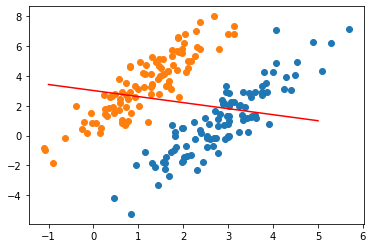

In [90]:
# sample = data_num x d
# mean
S_W = (sample1 - mean1).T @ (sample1 - mean1) + (sample2 - mean2).T @ (sample2 - mean2)
S_B = num * num / (num + num) * (mean1 - mean2).T.reshape(-1, 1) @ (mean1 - mean2).reshape(1, -1)

values_lda, vectors_lda = LA.eig(LA.inv(S_W) @ S_B)
principal_lda = vectors_lda[:, np.argmax(values_lda)]
x1 = np.array([-1, 5])
slope_lda = principal_lda[1] / principal_lda[0]
intercept_lda = data_mean[1] - slope_lda * data_mean[0]
plt.plot(x1, x1 * slope_lda + intercept_lda, color="red")
plt.scatter(sample1[:, 0], sample1[:, 1])
plt.scatter(sample2[:, 0], sample2[:, 1])
plt.show()

## (4) Histograms

Show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).
* You can use [`numpy.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) and/or [`matplotlib.pyplot.hist()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist).

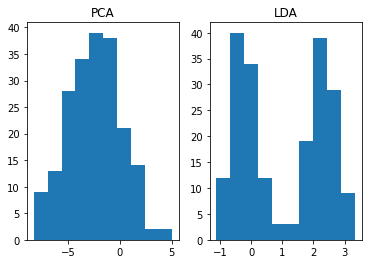

In [92]:
# Implement your code here
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(principal @ data)
ax1.set_title("PCA")

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(principal_lda @ data)
ax2.set_title("LDA")
plt.show()

# (5) Discussions
The histogram of the projected data points along with the 1st principal axis has a single peak. This indicates that PCA does not consider a class of each data. On the other hand, the histogram of the points projected along with 1st principal LDA axis has two peaks. This means that LDA considers a class of each data and separate data points by class.